In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
biogrid = pd.read_csv('BIOGRID2.tab.txt', sep='\t')


In [3]:
biogrid.head()

,OFFICIAL_SYMBOL_A,OFFICIAL_SYMBOL_B
0,MAP2K4,FLNC
1,MYPN,ACTN2
2,ACVR1,FNTA
3,GATA2,PML
4,RPA2,STAT3


In [ ]:
genesA = biogrid['OFFICIAL_SYMBOL_A'].tolist()
genesB = biogrid['OFFICIAL_SYMBOL_B'].tolist()
genes = genesA + genesB
genes = list(dict.fromkeys(genes))


In [14]:
endo_snp = pd.read_csv('FUMA_dowloads_all_tissue/SNPs/snps_ENDOMETRIOSIS.txt', sep='\t')
endo_genes = pd.read_csv('FUMA_dowloads_all_tissue/eQTL/eqtl_ENDOMETRIOSIS.txt',sep='\t')

In [ ]:
endo_snp = endo_snp[['uniqID', 'rsID', 'gwasP']].dropna()
endo_snp = endo_snp.sort_values(by='gwasP')
endo_snp.reset_index(inplace=True, drop=True)
endo_genes= endo_genes[['uniqID','symbol']].dropna()
endo_genes.reset_index(inplace=True, drop=True)
merged = pd.merge(endo_snp, endo_genes, on='uniqID', how='left').dropna()
merged = merged.drop_duplicates()
endo_snp.head()

In [6]:
G = nx.Graph()

for index, row in biogrid.iterrows():
    source_node = row['OFFICIAL_SYMBOL_A']
    target_node = row['OFFICIAL_SYMBOL_B']
       
    G.add_edge(source_node, target_node)

In [38]:
G.degree['TP53']


2209

In [53]:
nodes = merged['symbol'].tolist()
#select top n genes 
subset_of_nodes = nodes[:10]

# Create a new graph to store the shortest paths
H = nx.Graph()

# Find the shortest path between each pair of nodes in the subset
for i in range(len(subset_of_nodes)):
    for j in range(i + 1, len(subset_of_nodes)):
        node_i = subset_of_nodes[i]
        node_j = subset_of_nodes[j]
        
        # Check if both nodes exist in graph G
        if node_i in G and node_j in G:
            try:
                # Calculate shortest path if nodes exist in G
                path = nx.shortest_path(G, node_i, node_j)
                if len(path) <= 4:
                    #print(path)
                    path_edges = [(path[k], path[k+1]) for k in range(len(path)-1)]
                    #print(path_edges)
                    H.add_edges_from(path_edges)
            except nx.NetworkXNoPath:
                continue
        else:
            continue

# Find the minimum spanning tree of the new graph
mst = nx.minimum_spanning_tree(H, algorithm='kruskal')

""" # Print the edges of the minimum spanning tree
for edge in mst.edges(data=True):
    node1, node2 = edge[0], edge[1]
    print(f"Edge: {node1} -- {node2}") """


' # Print the edges of the minimum spanning tree\nfor edge in mst.edges(data=True):\n    node1, node2 = edge[0], edge[1]\n    print(f"Edge: {node1} -- {node2}") '

In [ ]:
# Find the leaves (outermost nodes) in the MST
leaves = [node for node, degree in mst.degree() if degree == 1]

# Prune the MST by removing the leaves
pruned_mst = mst.copy()  # Make a copy to avoid modifying the original MST
pruned_mst.remove_nodes_from(leaves)

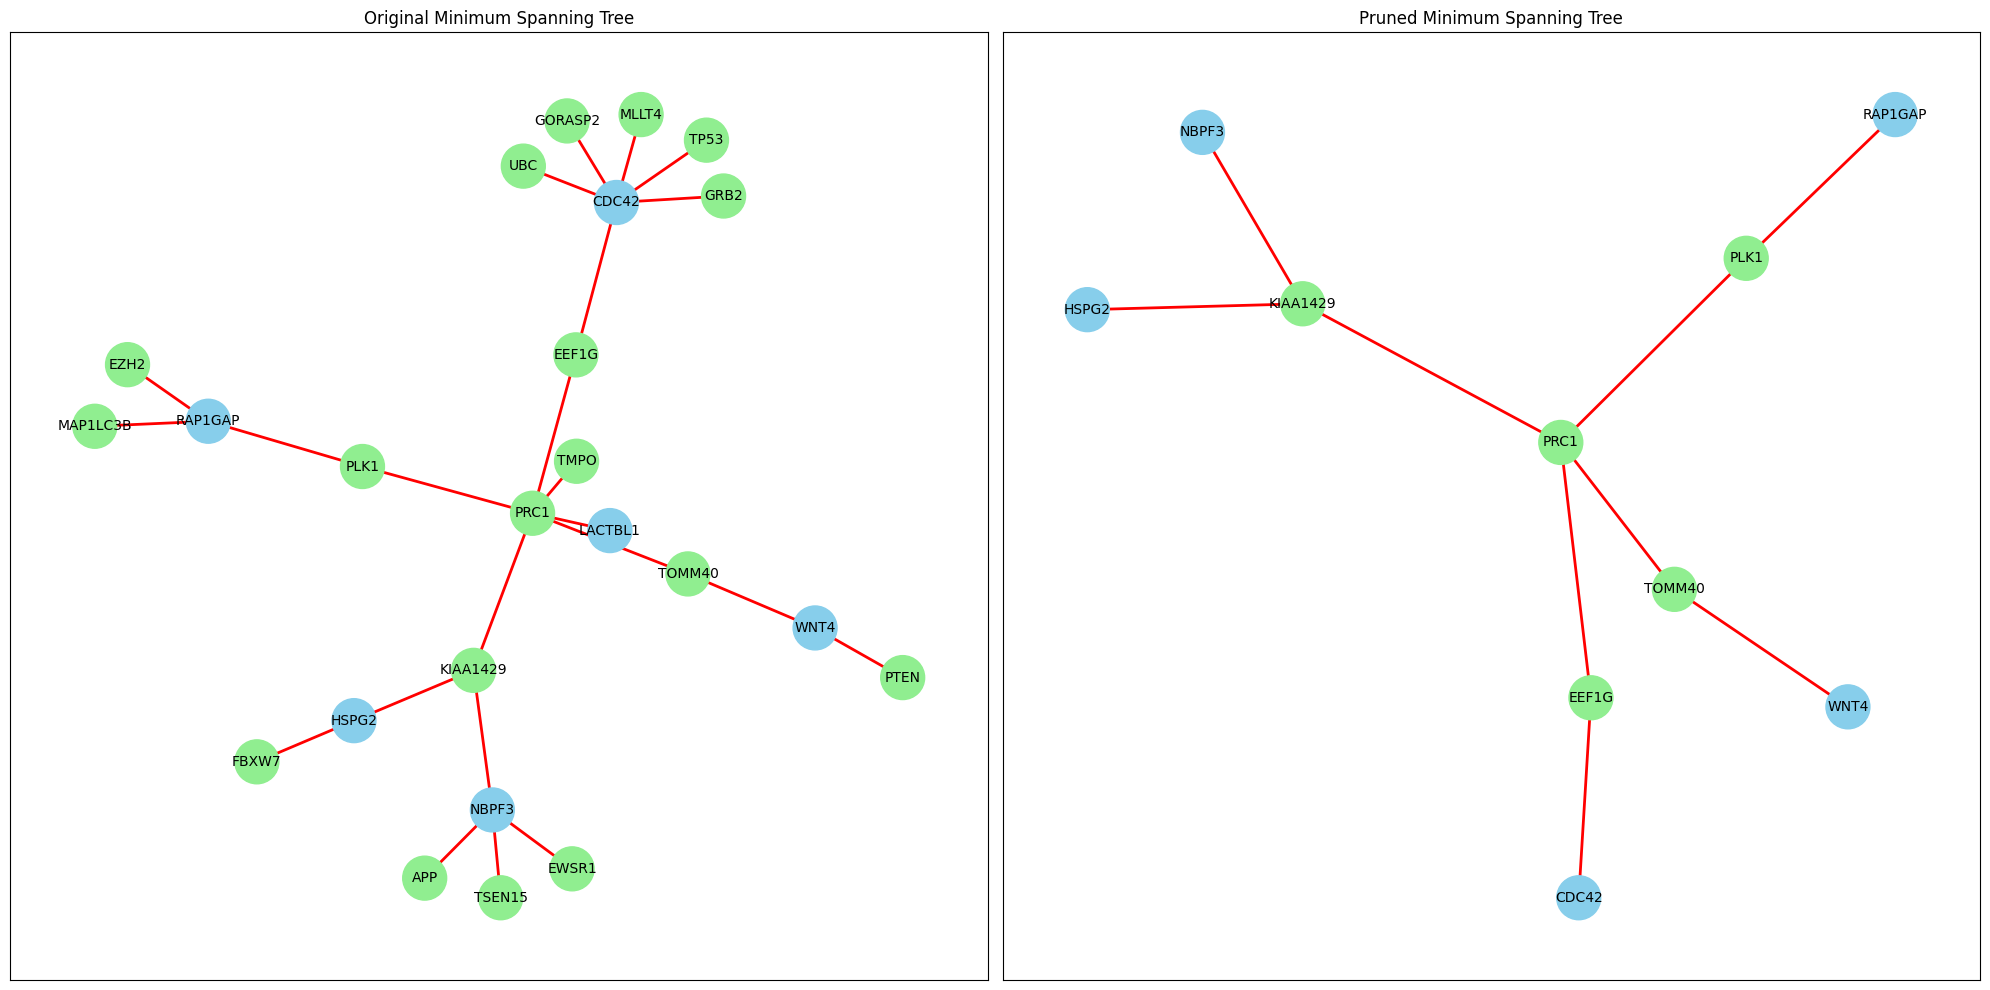

In [57]:

# Calculate node colors for the original MST
node_colors_mst = ['skyblue' if node in subset_of_nodes else 'lightgreen' for node in mst.nodes]

# Calculate node colors for the pruned MST
node_colors_pruned = ['skyblue' if node in subset_of_nodes else 'lightgreen' for node in pruned_mst.nodes]

# Set up the figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the original MST
axs[0].set_title("Original Minimum Spanning Tree")
pos_mst = nx.spring_layout(mst, seed=42)
nx.draw_networkx_nodes(mst, pos_mst, node_size=1000, node_color=node_colors_mst, ax=axs[0])
nx.draw_networkx_edges(mst, pos_mst, edge_color='red', width=2, ax=axs[0])
nx.draw_networkx_labels(mst, pos_mst, font_size=10, font_color='black', font_family='sans-serif', ax=axs[0])
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot the pruned MST
axs[1].set_title("Pruned Minimum Spanning Tree")
pos_pruned = nx.spring_layout(pruned_mst, seed=42)
nx.draw_networkx_nodes(pruned_mst, pos_pruned, node_size=1000, node_color=node_colors_pruned, ax=axs[1])
nx.draw_networkx_edges(pruned_mst, pos_pruned, edge_color='red', width=2, ax=axs[1])
nx.draw_networkx_labels(pruned_mst, pos_pruned, font_size=10, font_color='black', font_family='sans-serif', ax=axs[1])
axs[1].set_xticks([])
axs[1].set_yticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
print(subset_of_nodes)

['LACTBL1', 'CDC42', 'RAP1GAP', 'NBPF3', 'HSPG2', 'WNT4', 'CDC42', 'RAP1GAP', 'NBPF3', 'HSPG2']


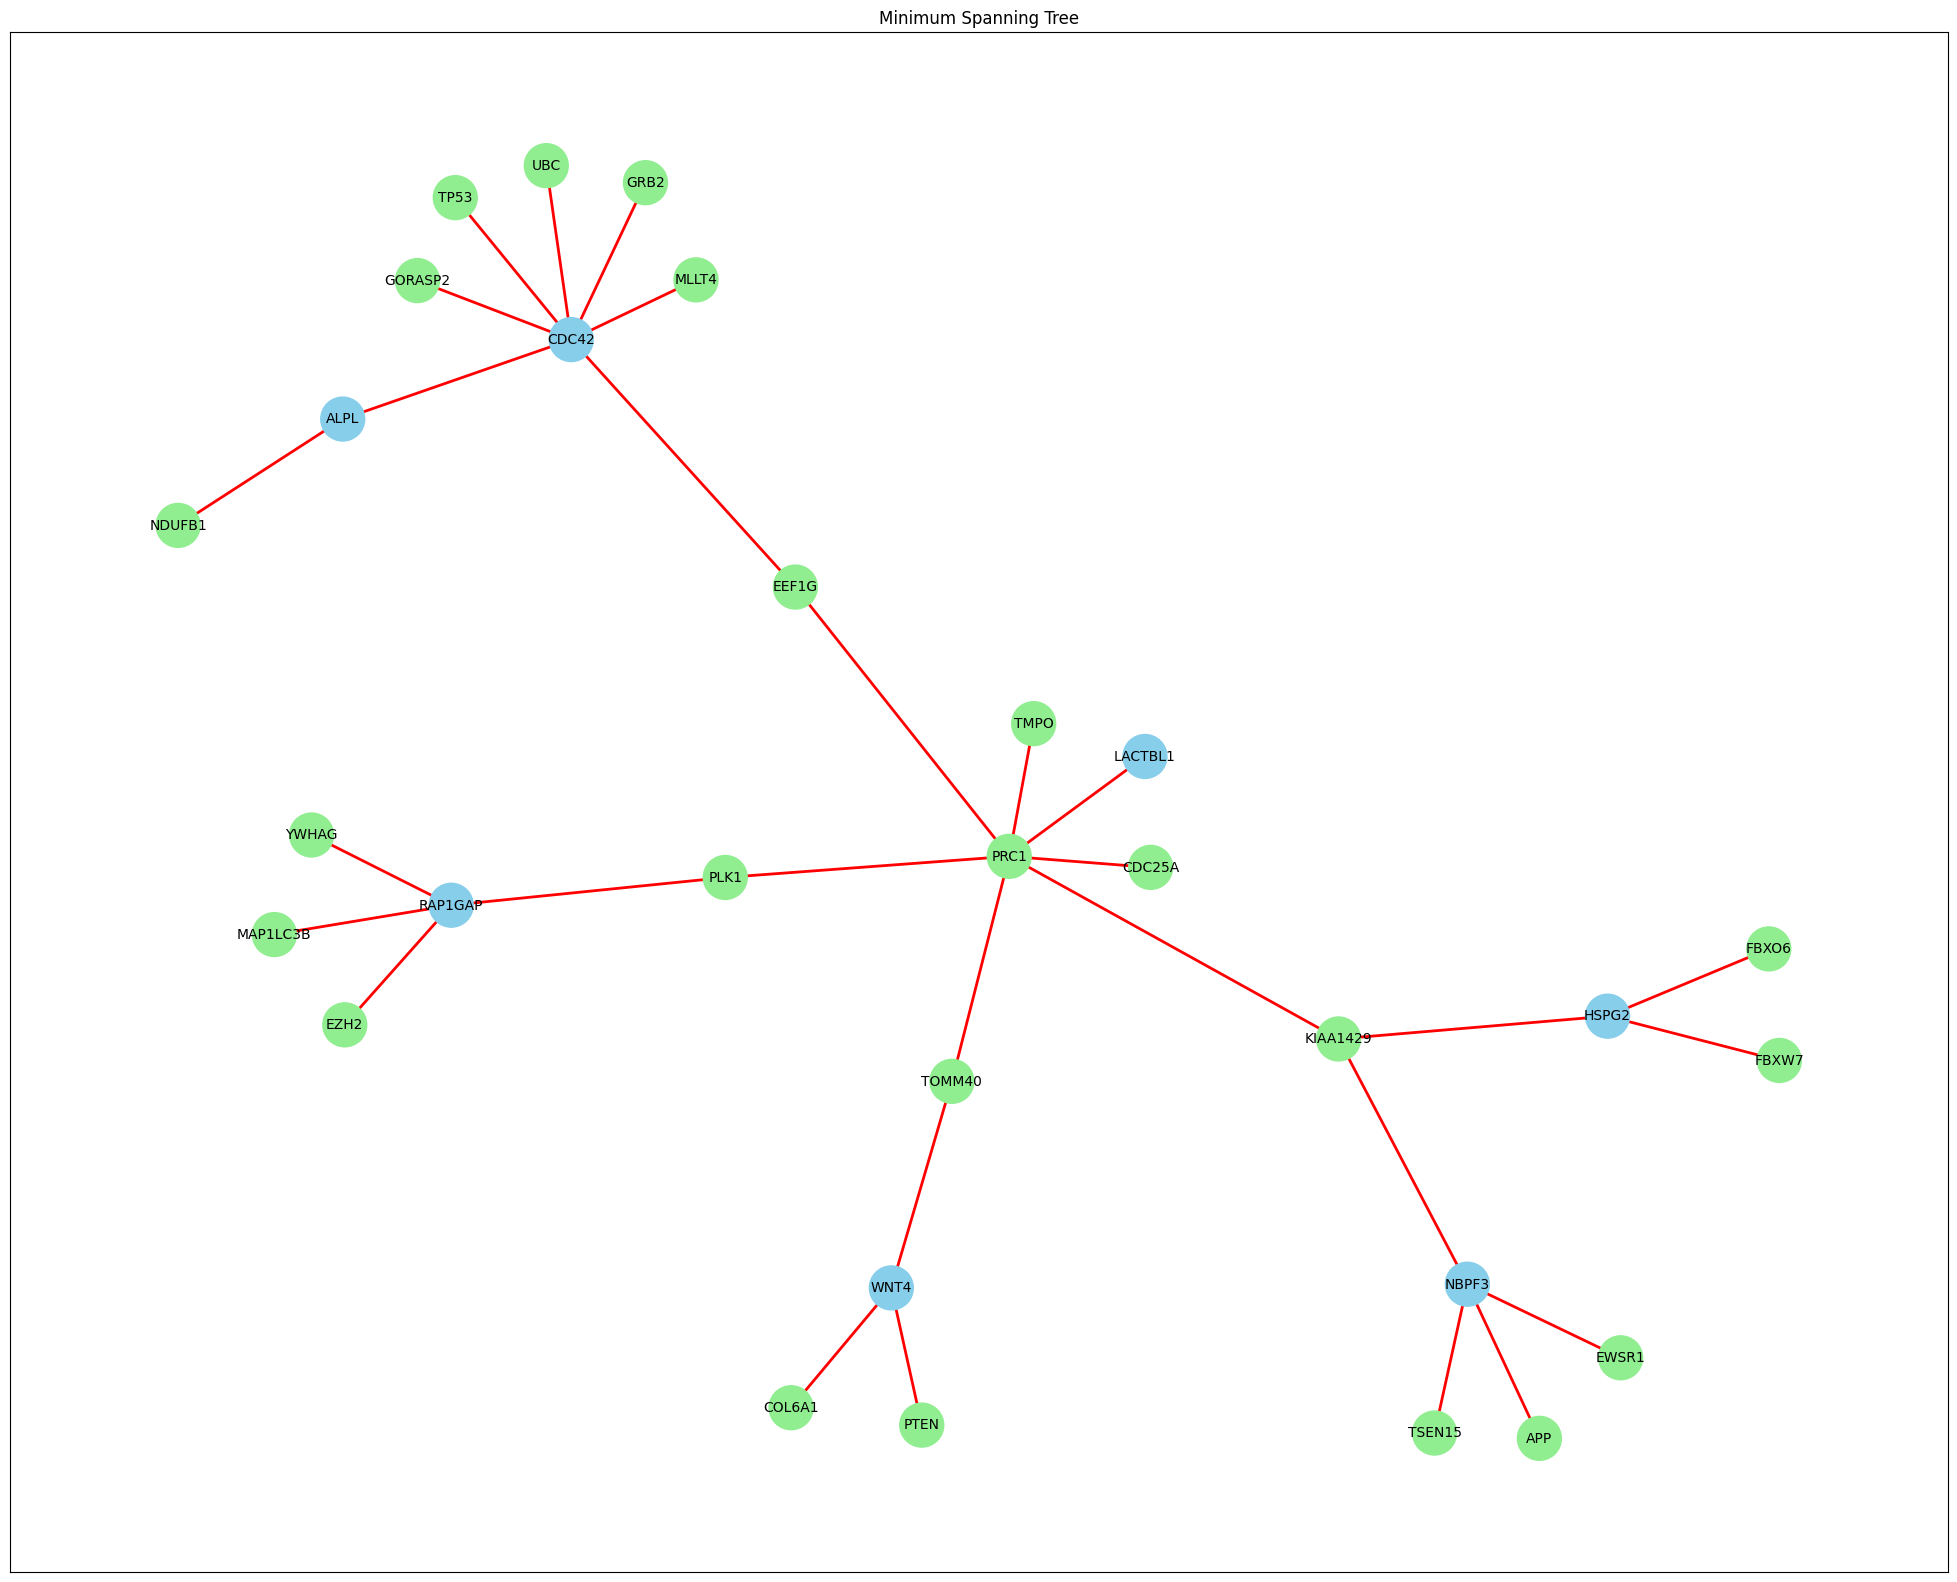

In [52]:
node_colors = ['skyblue' if node in subset_of_nodes else 'lightgreen' for node in mst.nodes]

# Plot the MST
plt.figure(figsize=(25,20))  # Set the figure size

# Extract positions for the nodes using a layout algorithm (e.g., spring layout)
pos = nx.spring_layout(mst, seed=42)

# Draw the nodes
nx.draw_networkx_nodes(mst, pos, node_size=1000, node_color=node_colors)

# Draw the edges
nx.draw_networkx_edges(mst, pos, edge_color='red', width=2)

# Add labels to the nodes
nx.draw_networkx_labels(mst, pos, font_size=10, font_color='black', font_family='sans-serif')

# Set the title of the plot
plt.title("Minimum Spanning Tree")

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()

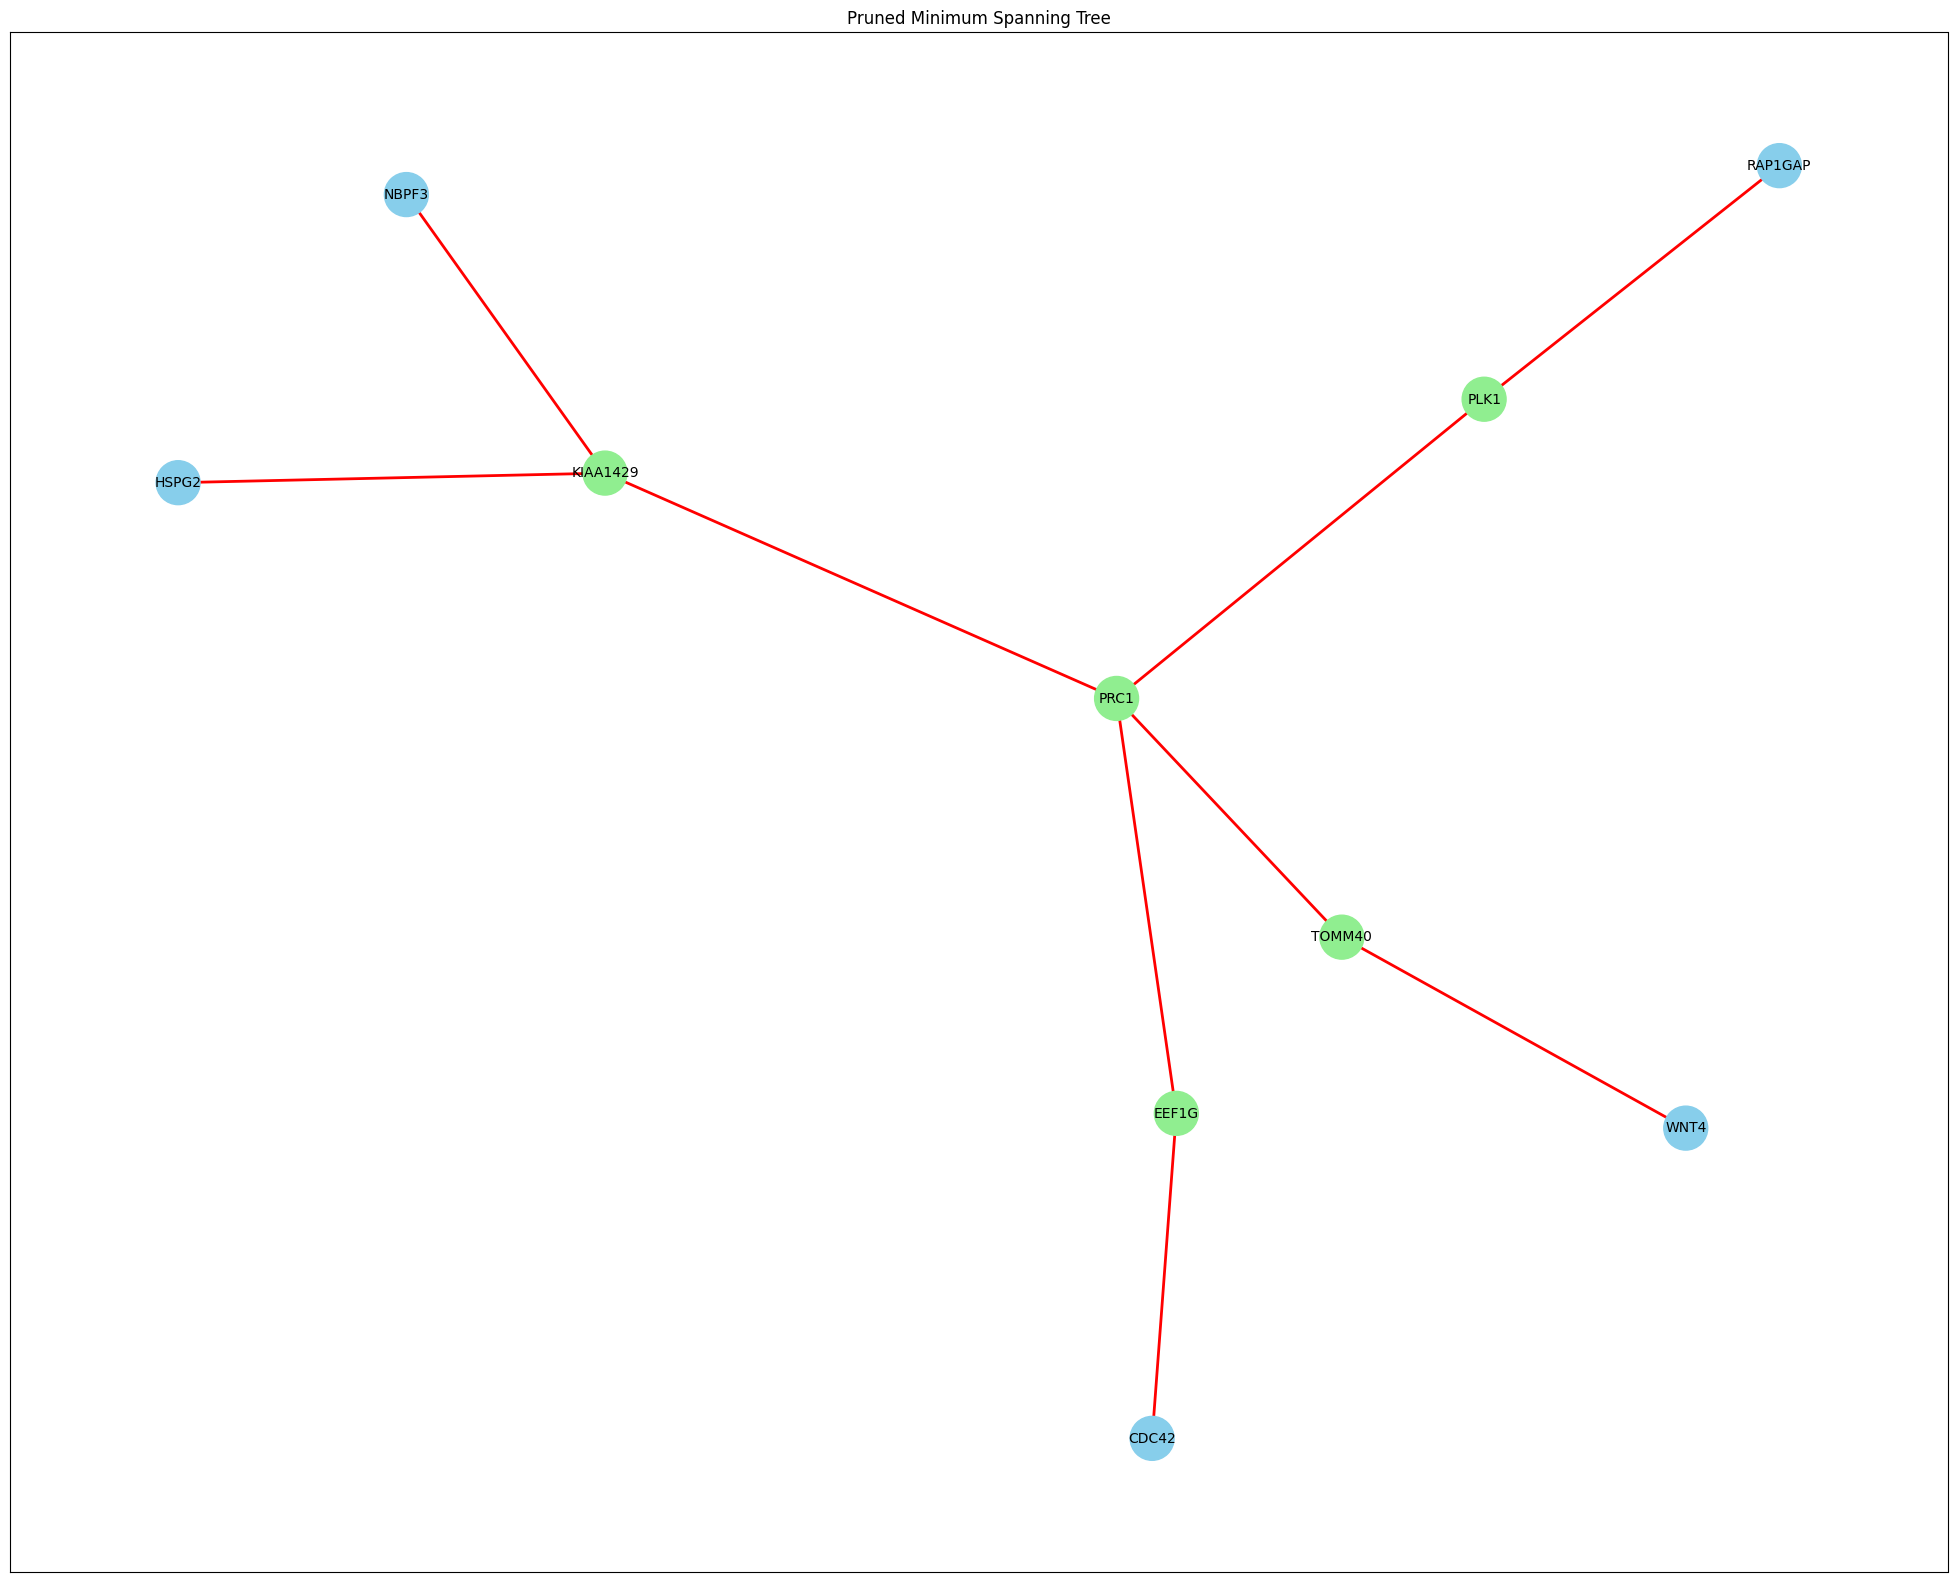

In [56]:
node_colors = ['skyblue' if node in subset_of_nodes else 'lightgreen' for node in pruned_mst.nodes]

# Plot the pruned MST
plt.figure(figsize=(25,20))  # Set the figure size

# Extract positions for the nodes using a layout algorithm (e.g., spring layout)
pos = nx.spring_layout(pruned_mst, seed=42)

# Draw the nodes with different colors
nx.draw_networkx_nodes(pruned_mst, pos, node_size=1000, node_color=node_colors)

# Draw the edges
nx.draw_networkx_edges(pruned_mst, pos, edge_color='red', width=2)

# Add labels to the nodes
nx.draw_networkx_labels(pruned_mst, pos, font_size=10, font_color='black', font_family='sans-serif')

# Set the title of the plot
plt.title("Pruned Minimum Spanning Tree")

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()